In [1]:
##Prepare a prediction model for profit of 50_startups data.
##Do transformations for getting better predictions of profit and
##make a table containing R^2 value for each prepared model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as sms

In [3]:
df=pd.read_csv(r'C:\Users\Shiva\Desktop\ExcelR assignments\MultiLinear Regression\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
## R&D Spend,Administration,Marketing Spend are independent & Profit is a dependent column
## performing EDA

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().any().sum()

0

In [8]:
df1=df.rename({'R&D Spend':'rdSpend','Administration':'Adm','Marketing Spend':'Marspend'}, axis = 1)
df1.head()

,rdSpend,Adm,Marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
#let us also check if we have any 0

In [10]:
df1[df1.values==0]

,rdSpend,Adm,Marspend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [11]:
print('rdspend absolute zero is',(df1['rdSpend']==0).sum(),'\n'
      'Adm absolute zero is',(df1['Adm']==0).sum(),'\n'
      'Marspend absolute zero is',(df1['Marspend']==0).sum(),'\n'
      'Profit absolute zero is',(df1['Profit']==0).sum())


rdspend absolute zero is 2 
Adm absolute zero is 0 
Marspend absolute zero is 3 
Profit absolute zero is 0


In [12]:
#looking if any outlier is present 

C:\Users\Shiva\AppData\Local\Temp\ipykernel_7576\2515276554.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


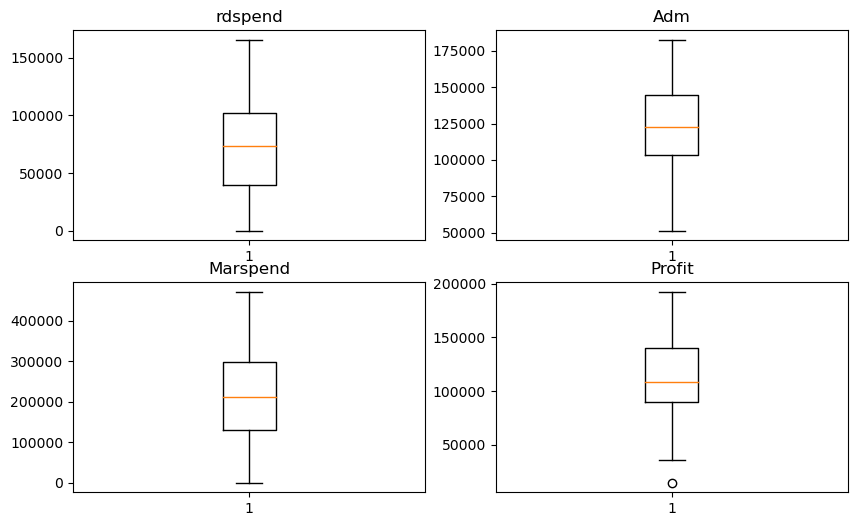

In [13]:
plt.subplots(figsize = (10,6))
plt.subplot(221)
plt.boxplot(df1['rdSpend'])
plt.title('rdspend')
plt.subplot(222)
plt.boxplot(df1['Adm'])
plt.title('Adm')
plt.subplot(223)
plt.boxplot(df1['Marspend'])
plt.title('Marspend')
plt.subplot(224)
plt.boxplot(df1['Profit'])
plt.title('Profit')
plt.show()

In [14]:
##the outlier is in Profit column, let us find the outlier 

In [15]:
Q1= np.quantile(df1.Profit,0.25)
Q3= np.quantile(df1.Profit,0.75)
med=np.median(df1.Profit)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

In [16]:
Profit_outlier = df1.Profit[(df1.Profit<=LB) | (df1.Profit>UB)]
Profit_outlier

49    14681.4
Name: Profit, dtype: float64

In [17]:
df1.tail()

,rdSpend,Adm,Marspend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [18]:
df1.iloc[49]

rdSpend            0.0
Adm           116983.8
Marspend      45173.06
State       California
Profit         14681.4
Name: 49, dtype: object

In [19]:
## Let us see the Rsqaured & adjusted r squared value btw the model & dependent variables, before treating the outlier

In [20]:
rawmodel=sms.ols('Profit~rdSpend+Adm+Marspend',data=df1).fit()

In [21]:
rawmodel.rsquared , rawmodel.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [22]:
## we can try removing  the outliers for better fit of the model

In [35]:
df2=df1.drop(49)
df2

,rdSpend,Adm,Marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
df2_model=sms.ols('Profit~rdSpend+Adm+Marspend',data=df2).fit()

In [38]:
df2_model.rsquared, df2_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [ ]:
##better than the raw model, let us predict the model using df2 model

In [39]:
df2_model.params

Intercept    52382.439251
rdSpend          0.783002
Adm             -0.022201
Marspend         0.025234
dtype: float64

In [40]:
df2.head()

,rdSpend,Adm,Marspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
mult_pred = pd.DataFrame()
mult_pred['Profit'] = df2.Profit
mult_pred['rdSpend'] = df2.rdSpend
mult_pred['Adm'] = df2.Adm
mult_pred['Marspend'] = df2.Marspend
mult_pred['Predicted_Profit'] = pd.DataFrame(df2_model.predict(mult_pred[['rdSpend','Adm','Marspend']]))
mult_pred

,Profit,rdSpend,Adm,Marspend,Predicted_Profit
0,192261.83,165349.20,136897.80,471784.10,190716.676999
1,191792.06,162597.70,151377.59,443898.53,187537.122227
2,191050.39,153441.51,101145.55,407934.54,180575.526396
3,182901.99,144372.41,118671.85,383199.62,172461.144642
4,166187.94,142107.34,91391.77,366168.42,170863.486721
5,156991.12,131876.90,99814.71,362861.36,162582.583177
6,156122.51,134615.46,147198.87,127716.82,157741.338633
7,155752.60,130298.13,145530.06,323876.68,159347.735318
8,152211.77,120542.52,148718.95,311613.29,151328.826941
9,149759.96,123334.88,108679.17,304981.62,154236.846778


In [47]:
df2_model.params

Intercept    52382.439251
rdSpend          0.783002
Adm             -0.022201
Marspend         0.025234
dtype: float64

In [51]:
df2.tail()

,rdSpend,Adm,Marspend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [46]:
manual0=52382.439251+0.783002*165349.20+-0.022201*136897.80+0.025234*471784.10
manual0

190716.92547100002

In [52]:
manual47=52382.439251+0.783002*0+-0.022201*135426.92+0.025234*0
manual47

49375.82620008